In [135]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'dql_const'
run_name = 'state_of_art'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [136]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 0.8
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type dql
gamma 1.0
episodes 3000.0
eta0 0.001
eta_decay_start 1000000.0
eta_decay_rate 0.9
eta_c 1.0
eps0 0.01
eps_decay_start 1000000.0
eps_decay_rate 1.3
eps_c 1.0
optimizer sgd
loss mse
max_power 0.0


In [137]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[      9      21      25 ... 2348129 2349554 2350903]


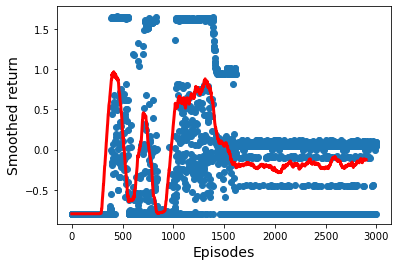

In [138]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(100), "valid")/100
plt.plot(smooth, color='red', lw=3)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()

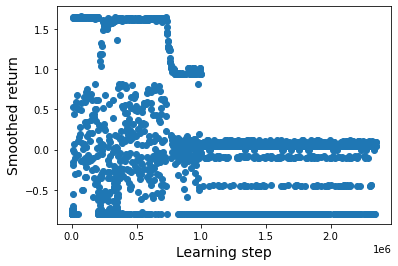

In [139]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

(4501, 15, 7, 3, 3)


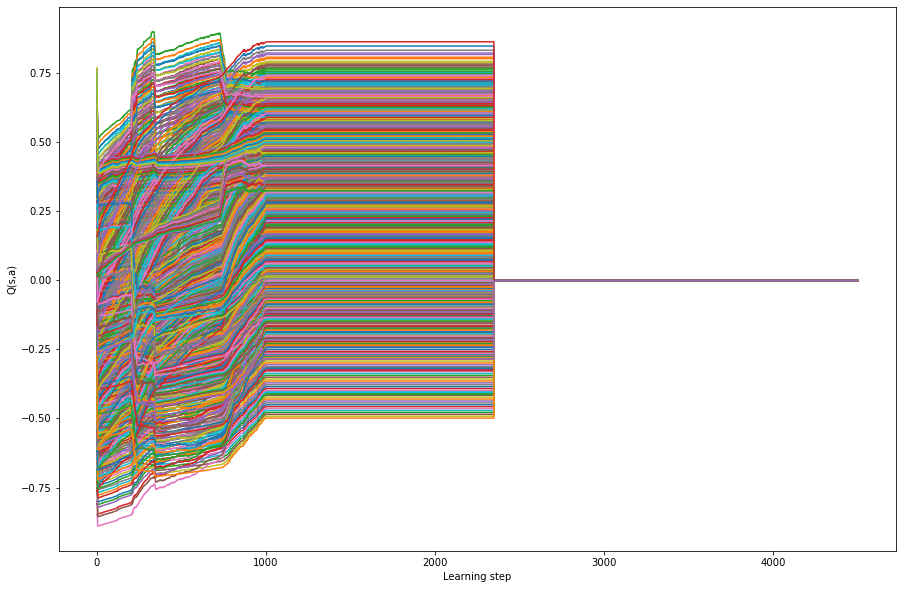

In [140]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
    plt.plot(Q_traj[0:5000,i])
plt.ylabel("Q(s,a)")
plt.xlabel("Learning step")
plt.savefig(data_dir+"quality_traj.png")
plt.show()

In [133]:
Q = np.load(data_dir+"best_quality.npy")
ind = np.argmax(Q_traj[4800])
np.unravel_index(ind, Q.shape)

FileNotFoundError: [Errno 2] No such file or directory: './data/dql_const/state_of_art/best_quality.npy'

In [134]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/dql_const/state_of_art/eval_traj.npy'

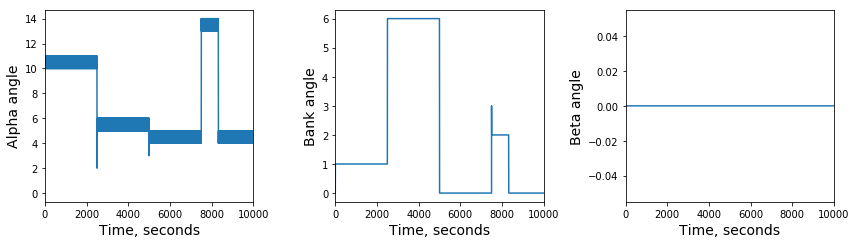

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

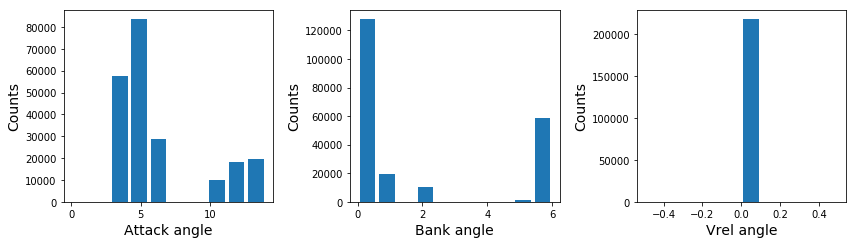

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()